# Regresión Logística

Documentación en sklearn del método de [regresión logística](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from mlutils import plot_decision_boundary # mlutils.py tiene que estar en la misma carpeta que esta notebook


## DataSet

Vamos a usar el dataset de Iris:

El conjunto de datos contiene 50 muestras de cada una de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros. Basado en la combinación de estos cuatro rasgos, Fisher desarrolló un modelo discriminante lineal para distinguir entre una especie y otra. Fuente [Wikipedia](https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris).

In [2]:
iris = datasets.load_iris()

Al igual que el dataset Diabetes que utilizamos en la notebook de [regresion lineal](https://github.com/nicoambrosis/Aprendizaje-Supervisado/blob/main/01_Linear_Regression.ipynb), el dataset Iris contiene datos en forma de array y ademas un monton mas de informacion. La informacion esta fragmentada en los diferentes atributos que tiene el objeto Iris

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
# inspeccionamos que tenemos en la descripcion del dataset
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
iris.data[:10], type(iris.data), iris.data.shape

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1]]),
 numpy.ndarray,
 (150, 4))

Dentro del objeto iris, los datos estan almacenados en el atributo data. Los datos estan guardados bajo el formato array de Numpy. Es una matriz de 150 filas (observaciones) y 4 columnas (features).

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
iris.target_names, iris.target 

(array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

El dataset contiene 3 clases o categorias ('setosa', 'versicolor' y 'virginica'). Son las 3 especies que exinten de la planta Iris.
- 0: SETOSA
- 1: VERSICOLOR
- 2: VIRGINICA

In [8]:
# convertir la matriz que tiene los datos en una DF de Pandas
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['target'] = iris.target # agregamos la columna target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [9]:
# analzamos que tipo de dato hay almacenado en cada columna
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int32
dtype: object

## Analisis exploratorio
Realizamos un analisis exploratorio sencillo para analizar si hay variables (features) que podrian estar correlacionadas

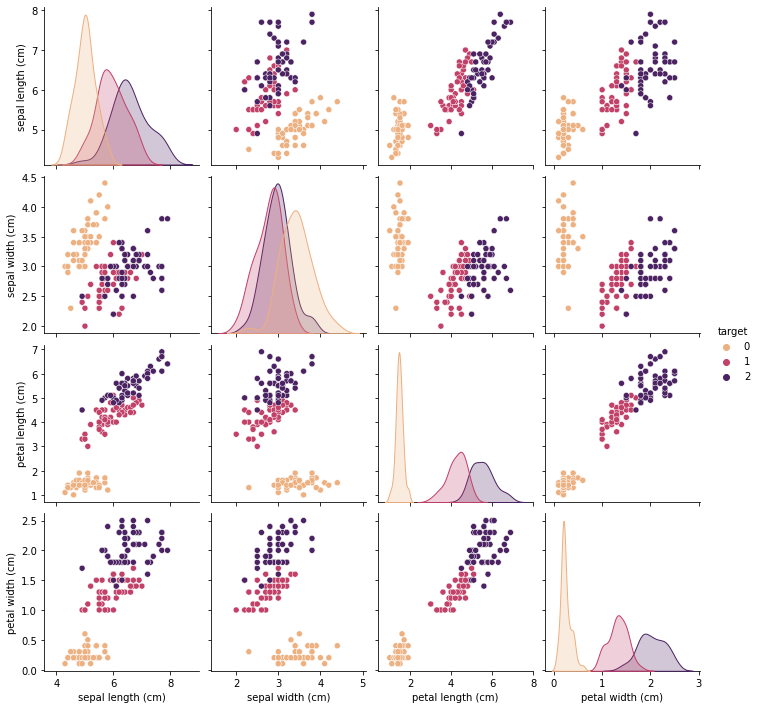

In [10]:
# una forma rapida de inspeccionar las relaciones entre todas las variables del dataset es usar el pairplot de Seaborn
sns.pairplot(df,hue='target', palette = 'flare')
plt.show()

Reduzcamos la base de datos para facilitar la comprensión de lo que estamos haciendo

In [11]:
# nos quedamos solo con las dos primeras features del dataset que corresponden a caracteristicas del sepalo.
# seleccinamos todas las "filas" y las dos primeras "columnas" del dataset
X = iris.data[:, :2]  # sepal length, sepal width
y = iris.target

In [12]:
# solo nos vamos a quedar con las categorias Setosa y Versicolor
X = X[y < 2]            # we only take two classes
y = y[y < 2]            # we only take two classes

In [13]:
df_small = pd.DataFrame(X, columns = ['sepal length (cm)', 'sepal width (cm)'])
df_small['target'] = y
df_small

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
95,5.7,3.0,1
96,5.7,2.9,1
97,6.2,2.9,1
98,5.1,2.5,1


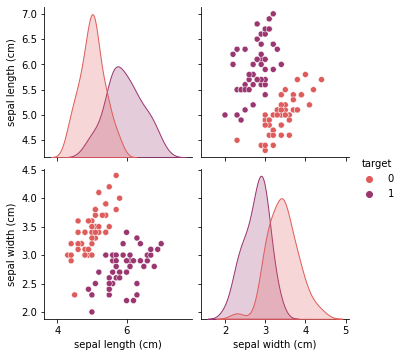

In [14]:
sns.pairplot(df_small,hue='target', palette = 'flare')
plt.show()

Probemos diferentes argumentos de la clase `LogisticRegression`

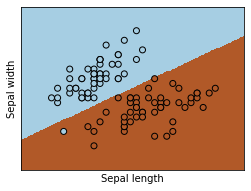

In [16]:
# create an instance of Logistic Regression Classifier
logreg = LogisticRegression(C=1e+3,
                            solver='liblinear',
                            max_iter=2)
logreg.fit(X, y)
plot_decision_boundary(X, y,logreg)

Algo de información acerca de los [solvers](https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-definitions) o métodos de optimización que utiliza scikit-learn para encontrar un mínimo.

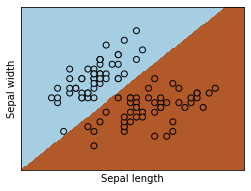

In [17]:
# update the number of iterations
logreg = LogisticRegression(C=1e+3,
                            solver='liblinear',
                            max_iter=20)
logreg.fit(X, y)
plot_decision_boundary(X, y, logreg)

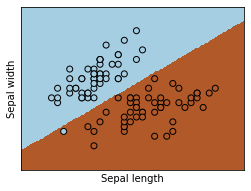

In [18]:
# update the number of iterations
logreg = LogisticRegression(C=1e+3,
                            solver='liblinear',
                            max_iter=20,
                            penalty='l1')
logreg.fit(X, y)
plot_decision_boundary(X, y, logreg)

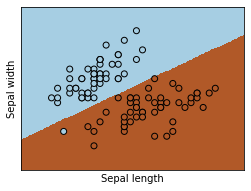

In [19]:
logreg = LogisticRegression(C=1e+8,
                            solver='saga',
                            max_iter=20,
                            penalty='elasticnet',
                            l1_ratio=0.7)
logreg.fit(X, y)
plot_decision_boundary(X, y, logreg)